<a href="https://colab.research.google.com/github/libella/IKT24/blob/main/LogisticRegressionSpamProjekt_1_Iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Trainingssetgröße:4387
Testsetgröße:1097
Genauigkeit: 0.99179580674567
Precision: 1.0
Recall: 0.4
F1 Score: 0.5714285714285715
Confusion Matrix: [[1082    0]
 [   9    6]]


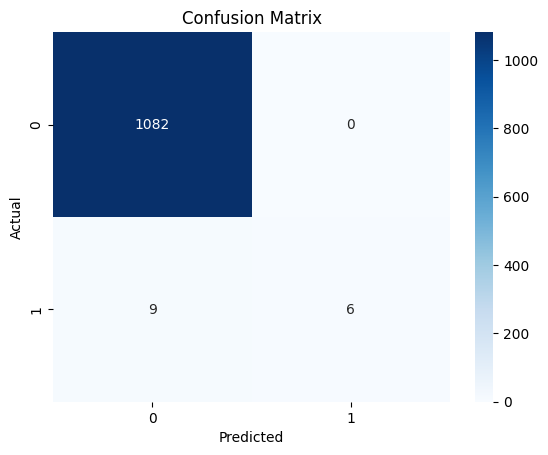

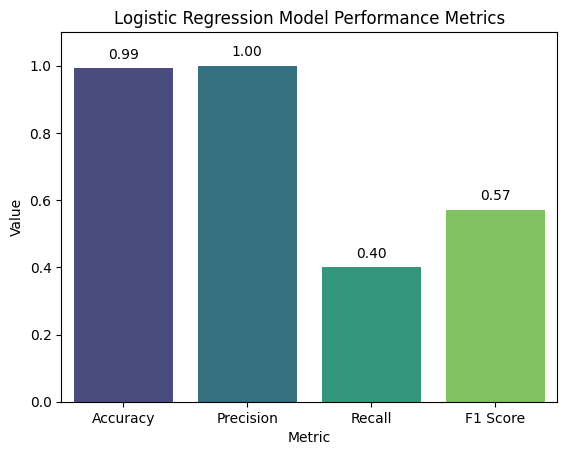

In [23]:
#teilt die Daten in Training und Testsets auf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from google.colab import drive
# Text in Zahlenfeatures konvertieren
from sklearn.feature_extraction.text import TfidfVectorizer
drive.mount('/content/drive')

# Daten werden geladen
file_path = '/content/drive/MyDrive/Colab Notebooks/ProjektSpam/spam_nichtspam_datensatz.csv'
df = pd.read_csv(file_path)
X = df[['message', 'mail']]  # Features
y = df['spam']  # Zielvariable

# Daten in Trainings- und Testsets aufteilen: 80% zu 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Trainingssetgröße:{X_train.shape[0]}')
print(f'Testsetgröße:{X_test.shape[0]}')

# Vektorisieren der Textdaten mit TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train['message'])
X_test_vec = vectorizer.transform(X_test['message'])

# Modell initialisieren und trainieren mit vektorisierten Daten
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Vorhersagen machen
y_pred = model.predict(X_test_vec)


# Genauigkeit berechnen
accuracy = accuracy_score(y_test, y_pred)
print(f'Genauigkeit: {accuracy}')

# Convert y_test and y_pred to numerical labels
y_test_numeric = y_test.astype(int)
y_pred_numeric = y_pred.astype(int)

# Precision, Recall, F1 Score (using numeric labels)
precision = precision_score(y_test_numeric, y_pred_numeric)
recall = recall_score(y_test_numeric, y_pred_numeric)
f1 = f1_score(y_test_numeric, y_pred_numeric)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Confusion Matrix (using numeric labels)
cm = confusion_matrix(y_test_numeric, y_pred_numeric)
print(f'Confusion Matrix: {cm}')

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

metrics = {'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],'Value': [accuracy, precision, recall, f1]}
df = pd.DataFrame(metrics)
sns.barplot(x='Metric', y='Value', hue='Metric', data=df, palette='viridis')
plt.ylim(0, 1.1)
plt.title('Logistic Regression Model Performance Metrics')
for i in range(len(df)):
    # Text auf den Balken setzen
    plt.text(i, df['Value'][i] + 0.02, f'{df["Value"][i]:.2f}', ha='center', va='bottom')
plt.show()